本书配套视频课程：[解剖深度学习原理，从0实现深度学习库](https://ke.qq.com/course/2900371?tuin=ac5537fd) 

更多代码或学习资料将向购买视频课程或书的学生提供。


+ 博客网站：[https://hwdong-net.github.io](https://hwdong-net.github.io)
+ youtube频道: [hwdong](http://www.youtube.com/c/hwdong)
+ bilibili网站：[hw-dong](https://space.bilibili.com/281453312)


# 第3章 线性回归、逻辑回归和softmax回归

### 3.1  线性回归

“餐车利润问题”数据集中的第一列是各个城市的人口，第2列则是该城市的餐车利润，数量都以10000为单位。

In [2]:
x , y = [] ,[]
with open('food_truck_data.txt') as A:
    for eachline in A:
        s = eachline.split(',')
        x.append(float(s[0]))
        y.append(float(s[1]))  
for i in range(5):
    print(x[i],y[i])

6.1101 17.592
5.5277 9.1302
8.5186 13.662
7.0032 11.854
5.8598 6.8233


将城市人口和餐车利润分别看成二维坐标平面上的x和y坐标，即每个数据样本看成二维平面上的坐标点，如图3-1，可以将数据集在二维平面上显示出来：

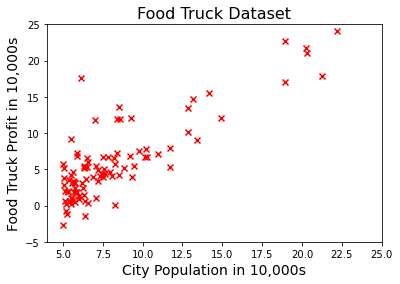

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()   
ax.scatter(x, y, marker="x", c="red")
plt.title("Food Truck Dataset", fontsize=16)
plt.xlabel("City Population in 10,000s", fontsize=14)
plt.ylabel("Food Truck Profit in 10,000s", fontsize=14)
plt.axis([4, 25, -5, 25])
plt.show()

用正规方程法求上述“餐车利润问题”的代码如下：

In [4]:
import numpy as np

data = np.loadtxt('food_truck_data.txt', delimiter=",") # data是m*2矩阵，每一行表示一个样本
train_x = data[:, 0]    # 城市人口，  m*1矩阵 
train_y = data[:, 1]    # 餐车利润，  m*1矩阵

X = np.ones(shape=(len(train_x), 2))
X[:, 1] = train_x 
y = train_y


XT = X.transpose()

XTy = XT @ y

w = np.linalg.inv(XT@X) @ XTy
print(w)

[-3.89578088  1.19303364]


求得了模型函数 𝑓(𝑥)=𝑤𝑥+𝑏 ，只要将一个城市人口数值 𝑥 代入这个函数，就可以用它预测餐车利润，如预测人口4.6（万）城市的餐车利润：

In [5]:
4.6*w[1]+w[0]

1.5921738849602525

用numpy的向量化运算写出计算梯度的代码：

In [6]:
X = train_x
w,b = 0.,0.
dw = np.mean((w*X+b-y)*X)
db = np.mean((w*X+b-y))
print(dw)
print(db)

-65.32884974555671
-5.839135051546393


求解线性回归的梯度下降法算法的代码：

In [7]:
def gradient_descent(x,y,w,b,alpha=0.01, iterations = 100,epsilon = 1e-9):    
    history=[]
    for i in range(iterations):
        dw = np.mean((w*x+b-y)*x)
        db = np.mean((w*x+b-y))       
        if abs(dw) < epsilon and abs(db) < epsilon:
           break;
     
        #更新w: w = w - alpha * gradient
        w -= alpha*dw 
        b -= alpha*db 
        history.append([w,b])  
       
    return history

用学习率alpha = 0.02和迭代次数iterations调用上述的梯度下降法，可以求出假设函数的参数:

In [8]:
alpha = 0.02
iterations=1000
history = gradient_descent(X,y,w,b,alpha,iterations)
print(len(history))
print(history[-1])

1000
[1.1822480052540145, -3.7884192615511796]


history记录了迭代过程中每一步的模型参数，最后一个参数就是最优的参数。

编写一个绘制模型参数 (𝑤,𝑏) 对应的假设函数直线的函数：

In [9]:
def draw_line(plt,w,b,x,linewidth =2):
    m=len(x)
    f = [0]*m
    for i in range(m): 
       f[i] = b+w*x[i]
    plt.plot(x, f, linewidth) 

下面的代码绘制求得的模型参数 (𝑤,𝑏) 对应的假设函数曲线（图2-3）：

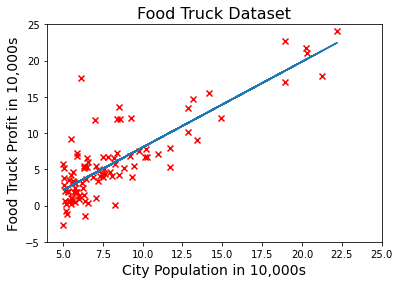

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

#fig, ax = plt.subplots()   
plt.scatter(X, y, marker="x", c="red")
plt.title("Food Truck Dataset", fontsize=16)
plt.xlabel("City Population in 10,000s", fontsize=14)
plt.ylabel("Food Truck Profit in 10,000s", fontsize=14)
plt.axis([4, 25, -5, 25])
w,b = history[-1]
draw_line(plt,w,b,X,6)
plt.show()

可以用如下的loss函数计算参数 (𝑤,𝑏) 对应的损失。

In [11]:
def loss(x,y,w,b):
    m = len(y)
    return np.mean((x*w+b-y)**2)/2
    cost = 0   
    for i in range(m):  
        f =  x[i]*w+b
        cost += (f-y[i])**2
    cost /=(2*m)
    return cost

print(loss(X,y,1,-3))

4.983860697569072


用loss()函数计算出迭代过程中所有参数w对应的损失，并绘制这个损失曲线（图2-4）：

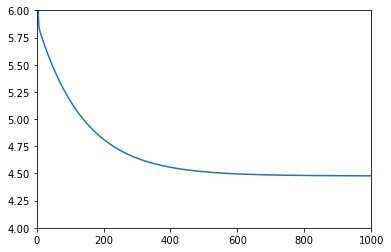

In [13]:
costs = [loss(X,y,w,b) for w,b in history]
plt.axis([0, len(costs), 4, 6])
plt.plot(costs)
plt.show()

对于这个一个自变量的线性回归，其损失函数是2个参数的函数，因此可以绘制出损失函数对应的曲面（图3-5），并画出迭代过程中未知参数的变化情况：

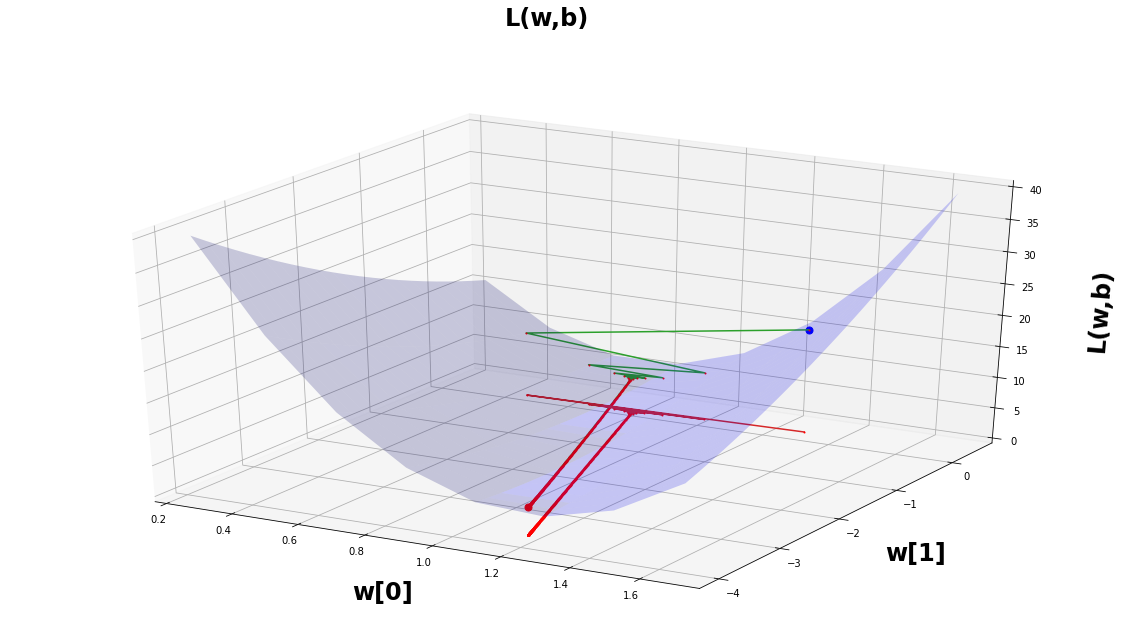

In [14]:
from mpl_toolkits.mplot3d import Axes3D
   
def plot_history(x,y,history,figsize=(20, 10)):
    w= [ e[0] for e in history]
    b= [ e[1] for e in history]

    xmin,xmax, xstep = min(w)-0.2,max(w)+0.2, .2
    ymin, ymax, ystep = min(b)-0.2,max(b)+0.2, .2
    ws,bs = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

    zs = np.array([loss(x, y, w,b)    for w,b in zip(np.ravel(ws), np.ravel(bs))])
    z = zs.reshape(ws.shape)

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')
    
    ax.set_xlabel('w[0]', labelpad=30, fontsize=24, fontweight='bold')
    ax.set_ylabel('w[1]', labelpad=30, fontsize=24, fontweight='bold')
    ax.set_zlabel('L(w,b)', labelpad=30, fontsize=24, fontweight='bold')

    ax.plot_surface(ws, bs, z, rstride=1, cstride=1, color='b', alpha=0.2)
    
    w_sart,b_start,w_end,b_end = history[0][0], history[0][1],history[-1][0], history[-1][1]
    ax.plot([w_sart],[b_start], [loss(x,y,w_sart,b_start)] , markerfacecolor='b', markeredgecolor='b', marker='o', markersize=7)
    ax.plot([w_end],[b_end], [loss(x,y,w_end,b_end)] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)

    z2 =  [loss(x,y,w,b) for w,b in history]
    ax.plot(w, b, z2  , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)
    ax.plot(w, b,  0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)
    
    fig.suptitle("L(w,b)", fontsize=24, fontweight='bold')
    return ws,bs,z
    
ws,bs,z = plot_history(X,y,history)

对于这种2个参数的损失函数，人们经常还在参数平面上画出损失函数的等值曲线（即具有相同损失函数值对应的参数平面曲线），并在参数平面上更清楚地观察迭代参数的变化情况：

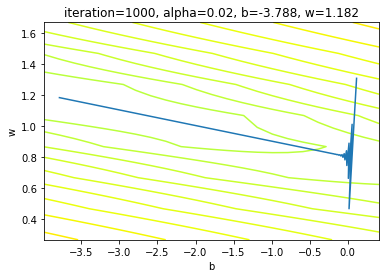

In [15]:
from matplotlib.colors import LogNorm
plt.contour(bs,ws,z,levels=np.logspace(-5, 5, 100), norm=LogNorm(), cmap=plt.cm.jet)

w= [ e[0] for e in history]
b= [ e[1] for e in history]
plt.plot(b,w)
plt.xlabel("b")
plt.ylabel("w")
title = str.format("iteration={0}, alpha={1}, b={2:.3f}, w={3:.3f}", iterations, alpha, b[-1], w[-1])
plt.title(title)

#plt.axis([result_w-1,result_w+1,result_b-1,result_b+1])
plt.show()

可以试试不同的学习率(learning rates)如0.01 , 0.015, 0.02，对每个学习率绘制其对应的代价历史(cost history)曲线（简称代价曲线）

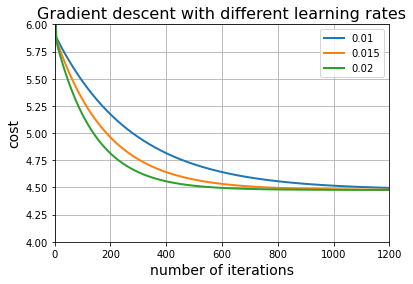

In [16]:
plt.figure()
num_iters = 1200
learning_rates = [0.01, 0.015, 0.02]
for lr in learning_rates:
    w,b=0,0 
    history = gradient_descent(X, y,w, b,lr, num_iters)
    cost_history = [loss(X,y,w,b) for w,b in history]
    plt.plot(cost_history, linewidth=2)
plt.title("Gradient descent with different learning rates", fontsize=16)
plt.xlabel("number of iterations", fontsize=14)
plt.ylabel("cost", fontsize=14)
plt.legend(list(map(str, learning_rates)))
plt.axis([0, num_iters, 4, 6])
plt.grid()
plt.show()

能不能用更大的学习率呢?

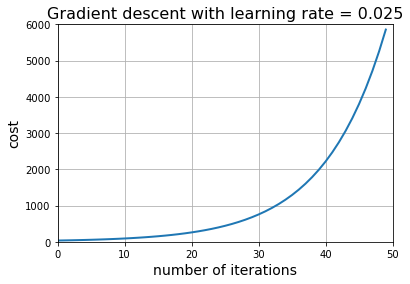

In [17]:
learning_rate = 0.025
num_iters = 50
w,b=0.,0.
history = gradient_descent(X, y,w, b,learning_rate, num_iters)
cost_history = [loss(X,y,w,b) for w,b in history]
plt.plot(cost_history, linewidth=2)
plt.title("Gradient descent with learning rate = " + str(learning_rate), fontsize=16)
plt.xlabel("number of iterations", fontsize=14)
plt.ylabel("cost", fontsize=14)
plt.axis([0, num_iters, 0, 6000])
plt.grid()
plt.show()

在损失曲面上显示迭代过程。

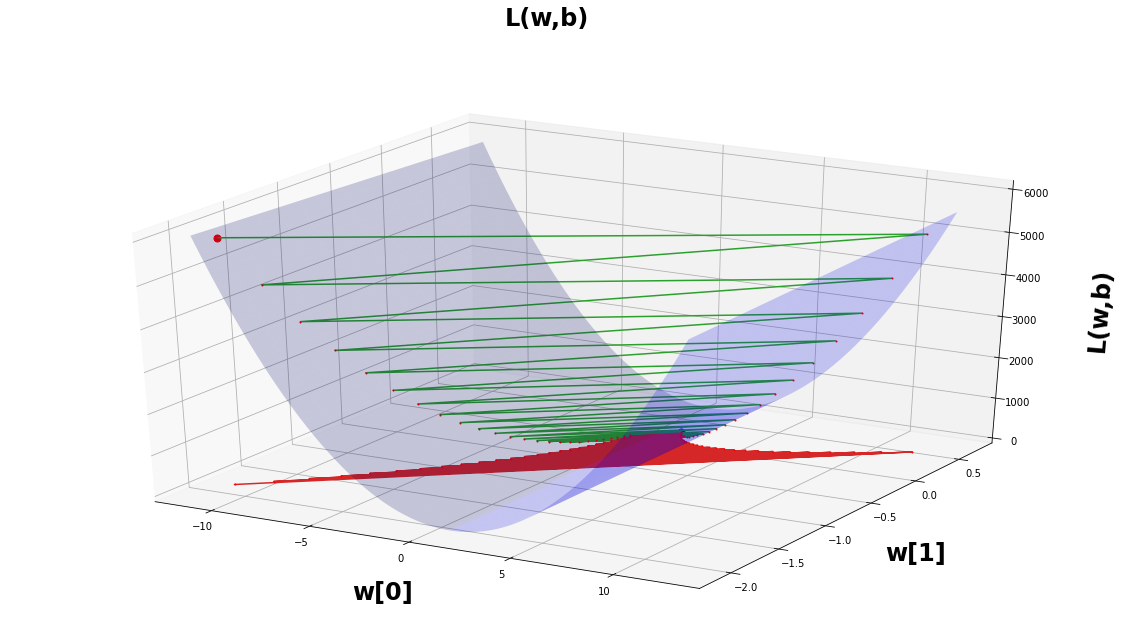

In [18]:
s,bs,z = plot_history(X,y,history)

目前学习率0.02比较合适，它能以较少的迭代次数收敛（最小化目标函数值）

### 3.1.7 梯度验证

前面讲过，在实际执行梯度下降法之前，应该先进行梯度验证，以保证梯度和函数值的计算是否正确。对于线性回归问题，就是要用下面的数值梯度来检验分析梯度计算是否正确。

$$\frac{\partial{L(w,b)}}{\partial{w}}=lim_{\epsilon->0}  \frac{L(w+\epsilon,b)-L(w-\epsilon,b)}{2\epsilon}$$
$$\frac{\partial{L(w,b)}}{\partial{b}}=lim_{\epsilon->0}  \frac{L(w,b+\epsilon)-L(w,b-\epsilon)}{2\epsilon} \tag{3-11}$$

对于前面的梯度下降法，可以用下面的代码来验证分析梯度和数值梯度是否一致。前面的 loss()函数是用来计算函数值$L(w,b)$的，而下面的2行代码是用于计算分析梯度的。
```
dw = np.mean((w*x+b-y)*x)
db = np.mean((w*x+b-y))  
```
可以定义一个函数计算数值梯度：

In [19]:
df_approx = lambda x,y,w,b,eps: ( (loss(x,y,w+eps,b)-loss(x,y,w-eps,b) )/(2*eps),  (loss(x,y,w,b+eps)-loss(x,y,w,b-eps) )/(2*eps) )

在任意一个点如 (𝑤,𝑏)=(1.0,−2.0) 比较分析和数值梯度。

In [20]:
w =1.0
b = -2.
eps = 1e-8
dw = np.mean((w*X+b-y)*X)
db = np.mean((w*X+b-y))                                   
grad = np.array([dw,db])
grad_approx = df_approx(X,y,w,b,eps)
print(grad)
print(grad_approx)
print(abs(grad-grad_approx))

[-0.24450692  0.32066495]
(-0.24450690361277339, 0.3206649612508272)
[1.98820717e-08 1.27972190e-08]


可以看到两者计算的结果是一致的。从而可以在梯度下降法中放心使用分析梯度了。 

### 3.1.8 预测

一旦确定了具体假设函数$f(x;w,b) = xw+b$的参数$w,b$，将一个新的数据（如城市人口）代入这个假设函数就能得到预测值（如餐车利润）。

例如，可以将训练集X中的所有$X[i]$代入这个假设函数，得到预测值$f(X[i];w,b) = X[i]w+b$。下列代码对$x$中的所有样本计算它们的预测值，并用这些预测值来绘制这些预测值对应的数据点（图2-10）。

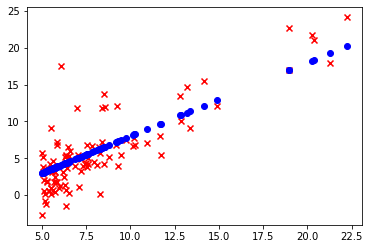

In [21]:
#用求得的w求X种样本的预测值
m=len(X)
predictions = [0]*m   
for i in range(m): 
    predictions[i] =  X[i]*w+b

plt.scatter(X, y, marker="x", c="red")
plt.scatter(X, predictions, marker="o", c="blue") 
#plt.plot(X, predictions, linewidth=2)  # plot the hypothesis on top of the training data
plt.show()

### 3.1.9 多特征的线性回归

$$f(\pmb x) = (x_1,x_2,\cdots,x_K) \begin{bmatrix} w_1\\w_2\\ \vdots\\w_K \end{bmatrix}+b  = \pmb x\pmb w+b $$

有时将b写成$w_0$，将所有未知参数表示成$\pmb w = (w_0,w_1,w_2,...,w_K)^T$，将$\pmb x$表示成$\pmb x = (x_0=1,x_1,x_2,...,x_K)$。假设函数表示成：

$f_{\pmb w}(\pmb x) = w_1 * x_1+w_2*x_2 +...+w_K*x_K+w_0 =  (x_0,x_1,x_2,\cdots,x_K) \begin{bmatrix}w_0\\ w_1\\w_2\\ \vdots\\w_K \end{bmatrix}  = \pmb x\pmb w$

$$f_{\pmb w}(\pmb X) = = \begin{bmatrix} \pmb x^{(1)}\\ \pmb x^{(2)}\\ \vdots\\\pmb x^{(m)} \end{bmatrix} \pmb w = \begin{bmatrix} \pmb x^{(1)}_0&\pmb x^{(1)}_1&\cdots&\pmb x^{(1)}_K\\ \pmb x^{(2)}_0&\pmb x^{(2)}_1&\cdots&\pmb x^{(2)}_K \\ \vdots\\ \pmb x^{(m)}_0&\pmb x^{(m)}_1&\cdots&\pmb x^{(m)}_K  \end{bmatrix} \pmb w = \pmb X \pmb w $$

可以很容易用numpy计算这个矩阵乘积，即用np.dot(X,W) 或X.dot(W)或 X@W计算。例如下面的$\pmb X$是2个样本，每个样本有3个特征，而$\pmb w$是对应3个特征的权值，然后可以直接计算$f_{\pmb w}(\pmb X) =  \pmb X \pmb w$

In [22]:
import numpy as np
X = np.array([[1,8,3],[1,7,5]]) # 2个样本，每个样本3个特征
w = np.array([1.3, 2.4,0.5]) # 权重
X@w

array([22. , 20.6])

$$L(\pmb w) = \frac{1}{2m}\sum_{i=1}^{m}(f_{\pmb w}(\pmb x^{(i)})-y^{(i)})^2$$ 


$L(\pmb {w})$关于$\pmb {w}$的梯度的列向量形式就是：

$$\nabla L(\pmb {w}) = {(\frac{\partial{ L(\pmb {w})}}{\partial{w_1}},\cdots,\frac{\partial{ L(\pmb {w})}}{\partial{w_j}},\cdots)}^T = \frac{1}{m}{\pmb X}^T({\pmb X}{\pmb w}-{\pmb y})$$

对上面的例子，可以直接用该公式计算损失函数关于$\pmb w$的梯度：

In [23]:
y = np.array([2.3,1.7]) 
(1/len(y))*X.transpose() @ (X@w-y)  # 或： (1/m)*X.T @ (X@W-y)

array([ 19.3 , 144.95,  76.8 ])

根据正规方程，可以得到$w$： 

$$\pmb w = {({\pmb X}^T{\pmb X})}^{-1}{\pmb X}^T{\pmb y}$$

#### 2. 拟合平面

下面代码生成一组采样自平面$z=2x+3y+c$的数据点样本，每个数据样本的特征是$(x,y)$，而其目标值是该点对应平面上的带噪声的$z$值：

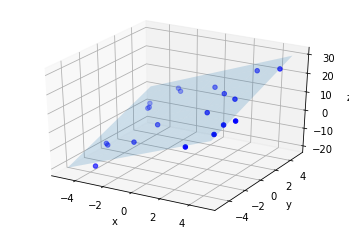

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

n_points = 20

a = 3
b = 2
c  = 5
x_range = 5
y_range = 5
noise = 3

xs = np.random.uniform(-x_range,x_range,n_points) 
ys = np.random.uniform(-y_range,y_range,n_points)
zs = xs*a+ys*b+ c+ np.random.normal(scale=noise)

#-----绘制平面-------------
# 创建网格点xx,yy
xx, yy = np.meshgrid([x for x in 
                      range(-x_range,x_range+1)], [y for y in range(-y_range,y_range+1)])
# 计算网格点(xx,yy)对应的z值zz
zz = a * xx +b * yy +c
# 绘制曲面
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, zz, alpha=0.2)

#-----绘制数据点-------------
ax = plt.gca()

ax.scatter(xs, ys, zs, color='b')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

plt.show()

用上述样本点求解正规方程拟合一个平面，并用拟合的函数计算原来的数据点(xs,ys)的预测值zs2，然后显示原来的数据点和拟合的数据点，以及原始平面和拟合的平面。

拟合的平面方程:
z = 3.000000 x + 2.000000 y + 1.548408
residual: 1.3166327655132898e-14


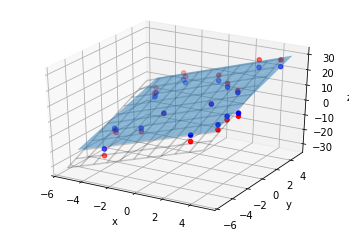

In [25]:
# 拟合一个平面
X = np.hstack((xs[:, None],ys[:, None]))
X = np.hstack((np.ones((len(xs), 1), dtype=xs.dtype),xs[:, None],ys[:, None]))
y = zs

# 计算正规方程
XT = X.transpose()
XTy = XT @ y
w = np.linalg.inv(XT@X) @ XTy

# 计算拟合误差
errors = y - X@w
residual = np.linalg.norm(errors)

print("拟合的平面方程:")
print("z = %f x + %f y + %f" % (w[1], w[2],w[0]))
print("residual:",residual)

# 绘制拟合的平面
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx2,yy2 = np.meshgrid(np.arange(xlim[0], xlim[1]),
                  np.arange(ylim[0], ylim[1]))
zz2 = w[1] * xx2 + w[1]  * yy2 +w[0] 

zs2 = w[1] * xs + w[1]  * ys +w[0] 
#ax.plot_wireframe(xx,yy,zz, color='k')
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, zz, alpha=0.5)
plt3d.plot_wireframe(xx2,yy2,zz2, color='k',alpha=0.2)

ax = plt.gca()
ax.scatter(xs, ys, zs, color='b')
ax.scatter(xs, ys, zs2, color='r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

下面是用numpy的向量运算的方式实现的梯度下降算法：

In [34]:
def linear_regression_vec(X, y, alpha, num_iters,gamma = 0.8,epsilon=1e-8):
    history = []          # 记录迭代过程中的参数
    X = np.hstack((np.ones((X.shape[0], 1), dtype=X.dtype),X))  #添加一列特征1    
    num_features = X.shape[1] 
    v= np.zeros_like(num_features)
    w = np.zeros(num_features)
    for n in range(num_iters):
        predictions = X @ w                 #求假设函数的预测值，即f(x)
        errors = predictions - y                # 预测值和真实值的误差
        gradient = X.transpose() @ errors /len(y)        #计算梯度
        if np.max(np.abs(gradient))<epsilon:
            print("gradient is small enough!")
            print("iterated num is :",n)
            break
        #w -= alpha * gradient        #更新模型的参数
        v = gamma*v+alpha* gradient
        w= w-v
        history.append(w)
        #cost_history.append((errors**2).mean()/2)     # compute and record the cost
    return history                  # return the history of optimized parameters 

In [35]:
learning_rate = 0.02
num_iters = 100
X = np.hstack((xs[:, None],ys[:, None]))
history = linear_regression_vec(X, y,learning_rate, num_iters)
print("w:",history[-1])

w: [1.54842739 2.99996022 1.99996724]


根据history里记录的迭代过程中的模型参数，计算每个迭代过程中的模型参数对应的假设函数在训练数据集上的平均损失：

In [31]:
def compute_loss_history(X,y,w_history):
    loss_history = []
    for w in w_history:         
        errors = X@w[1:]+w[0]-y
        loss_history.append((errors**2).mean()/2)
    return loss_history

[42.798629500847355, 0.9328728236302751, 0.47169994992919884, 0.02399320277672412, 0.003281074884911434, 0.0005299502925957225, 1.646883873838522e-05, 6.941946706979897e-06, 2.872974648745652e-07, 5.50176077352465e-08]


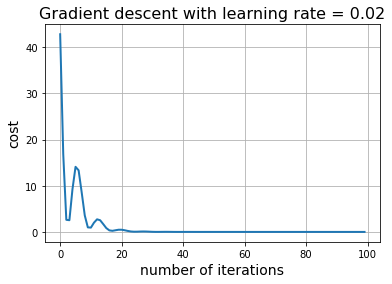

In [32]:
loss_history = compute_loss_history(X,y,history)
print(loss_history[:-1:10])
plt.plot(loss_history, linewidth=2)
plt.title("Gradient descent with learning rate = " + str(learning_rate), fontsize=16)
plt.xlabel("number of iterations", fontsize=14)
plt.ylabel("cost", fontsize=14)
plt.grid()
plt.show()

## 3.2 数据的规范化

### 3.2.1 预测⼤坝出⽔量

吴恩达的机器学习课程给了一个“根据水库水位的变化预测大坝出水量”的问题，其中的样本数据记录了水库水位变化和对应的大坝出水量，这些数据保存在文件"water.mat"中，可以用 SciPy的loadmat()来读取这个matlab格式的数据文件。

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

dataset = sio.loadmat("water.mat")
x_train = dataset["X"]
x_val = dataset["Xval"]
x_test = dataset["Xtest"]

# squeeze the target variables into one dimensional arrays
y_train = dataset["y"].squeeze()
y_val = dataset["yval"].squeeze()
y_test = dataset["ytest"].squeeze()
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)
print(x_train[:5])
print(y_train[:5])

(12, 1) (12,)
(21, 1) (21,)
(21, 1) (21,)
[[-15.93675813]
 [-29.15297922]
 [ 36.18954863]
 [ 37.49218733]
 [-48.05882945]]
[ 2.13431051  1.17325668 34.35910918 36.83795516  2.80896507]


样本数据分为训练集、验证集和测试集，x_train和y_train是训练集的数据特征和目标值，x_val和y_val是验证集的数据特征和目标值，x_test和y_test是训练集的数据特征和目标值。可以在二维平面上可视化显示训练集和验证集的样本点。如图3-14,其中红色点、蓝色点分别是训练样本和验证样本。

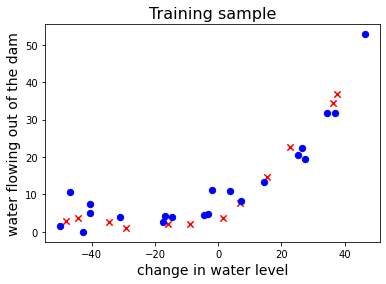

In [38]:
plt.scatter(x_train, y_train, marker="x", s=40, c='red')
plt.scatter(x_val, y_val, marker="o", s=40, c='blue')
plt.xlabel("change in water level", fontsize=14)
plt.ylabel("water flowing out of the dam", fontsize=14)
plt.title("Training sample", fontsize=16)
plt.show()

调用linear_regression_vec()执行线性回归:

In [39]:
X,y = x_train,y_train
alpha = 0.001
iterations = 100000
history = linear_regression_vec(X,y,alpha,iterations)
w = history[-1]
print("w",history[-1])
loss_history = compute_loss_history(X,y,history)
print(loss_history[:-1:len(loss_history)//10])
print(loss_history[-1])

gradient is small enough!
iterated num is : 4232
w [13.0879035   0.36777923]
[106.08297267143769, 23.666015886214183, 22.39338816981072, 22.374200228481484, 22.373910923850048, 22.3739065618829, 22.37390649611569, 22.37390649512409, 22.373906495109143, 22.373906495108923, 22.373906495108912]
22.373906495108915


下面的函数绘制代价曲线和训练模型的预测值：

In [40]:
def plot_history_predict(X,y,w,loss_history,fig_size=(12,4)):
    fig = plt.gcf()
    fig.set_size_inches(fig_size[0], fig_size[1], forward=True)
    
    plt.subplot(1, 2, 1)
    plt.plot(loss_history)
    
    X = np.hstack((np.ones((X.shape[0], 1), dtype=X.dtype),X))  #添加一列特征1    
    x = X[:,1]
    
    predicts = X @ w
    plt.subplot(1, 2, 2)
    plt.scatter(x, predicts) #, marker="x", c="red")
    
    indices = x.argsort()
    sorted_x = x[indices[::-1]]
    sorted_predicts = predicts[indices[::-1]]
    
    plt.plot(sorted_x, sorted_predicts, color = 'red') 
 #   plt.plot(x, predicts, color = 'red') 

    plt.scatter(x, y) #, marker="x", c="red")
    plt.show()  


制损失曲线和训练样本的预测值：

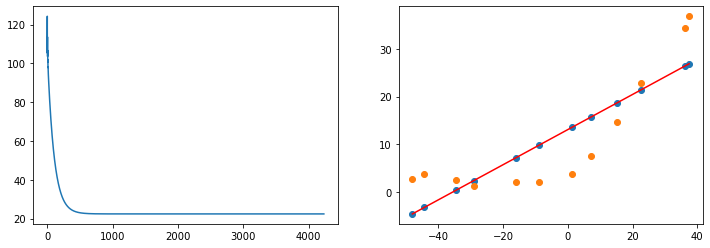

In [41]:
loss_history = compute_loss_history(X,y,history)
plot_history_predict(X,y,w,loss_history)

水位和出水量并不是一个线性关系，线性假设函数并不是一个最好的选择。它们之间应该是一个非线性的关系，自然地，会想到用一个多项式函数如一元3次多项式来表示压强y和温度x之间的这种非线性关系。

$$f(x) = w_3x^3+w_2x^2+w_1x+w_0 = (1,x,x^2,x^2){(w_0,w_1,w_2，w_3)}^T$$

从最初的特征$x$人为地构造新特征$x^2,x^3$，加上将1也作为特征，即可将$\pmb x$看成是4个特征构成的一个数据特征向量$\pmb x = (1,x,x^2,x^3)$。

$$f(\pmb x;\pmb w) = (1,x,x^2,x^3){(w_0,w_1,w_2,w_3)}^T = \pmb x \pmb w$$

其中，$\pmb w$是模型参数。

先生成4个特征（包含1）的数据：

In [42]:
X  = np.hstack((X,X**2,X**3))
print(X[:3])

[[-1.59367581e+01  2.53980260e+02 -4.04762197e+03]
 [-2.91529792e+01  8.49896197e+02 -2.47770062e+04]
 [ 3.61895486e+01  1.30968343e+03  4.73968522e+04]]


执行梯度下降法，却发现损失函数不断快速增大直到无穷大，并没有收敛。

In [44]:
history = linear_regression_vec(X,y,alpha,iterations)
print("w:",history[-1])

<ipython-input-34-a3fa2f9ea4ed>:10: RuntimeWarning: overflow encountered in matmul
  gradient = X.transpose() @ errors /len(y)        #计算梯度
<ipython-input-34-a3fa2f9ea4ed>:10: RuntimeWarning: invalid value encountered in matmul
  gradient = X.transpose() @ errors /len(y)        #计算梯度


w: [nan nan nan nan]


### 3.2.2 数据的规范化

对一个特征的规范化过程很简单：首先需要计算所有样本关于这个特征的平均值，再计算所有样本的这个特征围绕平均值的偏移程度（即标准差），最后将所有样本的这个特征减去其平均值并除以标准差。

$$x \leftarrow \frac{x-mean(x)}{stddev(x)}  \tag{3-24}$$


In [45]:
mean = np.mean(X, axis=0)
stddev = np.std(X, axis=0)
print(mean)
print(stddev)
X = (X-mean)/stddev
#X2[:,1:] = (X2[:,1:]-mean[1:])/stddev[1:]
print(X[:3])

[-5.08542635e+00  8.48904834e+02 -1.28290173e+04]
[2.86887308e+01 7.54346385e+02 4.61380464e+04]
[[-3.78243704e-01 -7.88662325e-01  1.90328720e-01]
 [-8.38920100e-01  1.31420204e-03 -2.58961742e-01]
 [ 1.43871736e+00  6.10831582e-01  1.30534069e+00]]


对于规范化的数据，就可以采用比较大的学习加快收敛速度了：

In [46]:
alpha = 0.3
history = linear_regression_vec(X,y,alpha,iterations)
print("w:",history[-1])
loss_history = compute_loss_history(X,y,history)
print(loss_history[:-1:len(loss_history)//10])
print(loss_history[0],loss_history[-1])

gradient is small enough!
iterated num is : 186
w: [11.21758932 11.33617058  7.61835033  2.39058388]
[66.33875695666133, 1.2177302089369388, 0.7300248803812178, 0.7169042030439288, 0.7163708782460617, 0.7163655445395009, 0.716365458967088, 0.7163654554751844, 0.7163654554466984, 0.7163654554465998, 0.7163654554465827]
66.33875695666133 0.7163654554465829


再次绘制损失曲线、拟合模型及其训练样本的预测值。

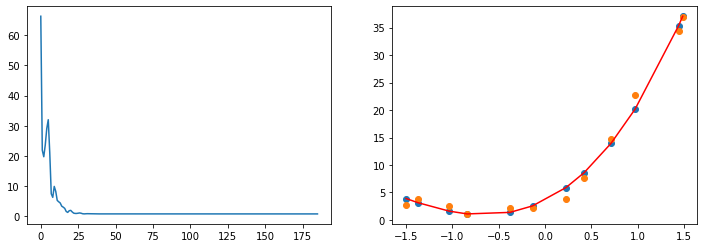

In [47]:
plot_history_predict(X,y,history[-1],loss_history)

用9次多项式曲线作为函数模型，可以看到训练集的误差非常小了。

w: [ 1.12175893e+01  9.70254834e+00  1.78687279e+01  2.24463156e+01
 -2.40167938e+01 -5.18112169e+01 -3.10644297e-02  3.03604478e+01
  2.43339480e+01  1.33876716e+01]
[79.14476005753899, 0.055451482748361876, 0.049890993181668515, 0.0466514294230935, 0.044031955443562955, 0.04189069702401279, 0.04012739598272104, 0.038663476362514326, 0.03743725317121494, 0.036400278691007544]
79.14476005753899 0.035514562768199316


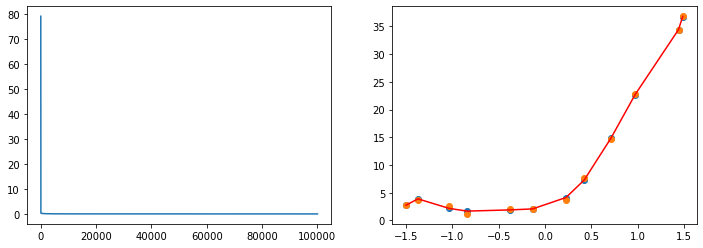

In [48]:
X = x_train
K = 9
X = np.hstack([np.power(X,k+1) for k in range(K)])
mean = np.mean(X, axis=0)
stddev = np.std(X, axis=0)
X = (X-mean)/stddev

history = linear_regression_vec(X,y,alpha,iterations)
print("w:",history[-1])
loss_history = compute_loss_history(X,y,history)
print(loss_history[:-1:len(loss_history)//10])
print(loss_history[0],loss_history[-1])

plot_history_predict(X,y,history[-1],loss_history)

对该问题，9次多项式是不是比3次多项式更好呢？

## 3.3 模型的评估


###  3.3.1  欠拟合和过拟合

在正弦曲线附近随机采样了一些坐标点(x,y)：

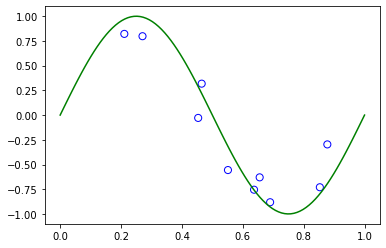

In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(896)

def sample(n_samples,std = 0.25):
    x = np.sort(np.random.uniform(0,1,n_samples))
    y = np.sin(2*np.pi*x) + np.random.normal(scale = std, size=x.shape)
    return x,y
    
n_samples = 10
x,y = sample(n_samples)
#x = np.sort(np.random.uniform(0,1,n_samples))
#y = np.sin(2*np.pi*x) + np.random.normal(scale = 0.25, size=x.shape)

x_test =  np.linspace(0, 1, 100)
xx = x_test
y_test = np.sin(2*np.pi*x_test)
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.scatter(x, y,facecolor="none", edgecolor="b", s=50, label="training data")
plt.show()

用不同次数K的多项式拟合这些样本点(x,y)，并用正规方程法求解模型函数：

w=: [-0.19410186]
w=: [ 1.167293   -2.40352288]
w=: [ -0.69160733  14.4684786  -40.54048788  27.82130232]
w=: [   -4850.58138275    82357.68505859  -572250.34179688  2099805.484375
 -4310128.5         4541129.375       -994781.625      -2845787.5
  2864116.6875      -860148.515625  ]


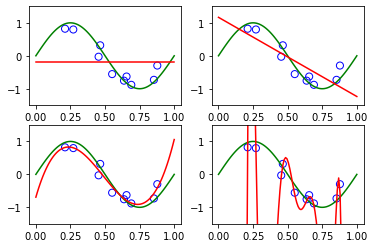

In [52]:
for i, K in enumerate([0, 1, 3, 9]):
    plt.subplot(2, 2, i + 1)
    X = np.array([np.power(x,k) for k in range(K+1)])
    X = X.transpose()
    
    #w,history = gradient_descent_vec(X,y,lr,iterations)
    XT = X.transpose()
    XTy = XT @ y
    w = np.linalg.inv(XT@X) @ XTy
    #w = np.linalg.pinv(X) @ y
    print("w=:",w)
    
    y_predict = 0 #np.zeros(x_test.shape) 
    for i,wi in enumerate(w):
        y_predict+=wi*np.power(x_test,i) 
        
    
    plt.scatter(x, y,facecolor="none", edgecolor="b", s=50, label="training data")
    
    
    y_test = np.sin(2*np.pi*x_test)
    plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
    plt.plot(x_test, y_predict, c="r", label="fitting")
    plt.ylim(-1.5, 1.5)

plt.show()

对这个例子，0次、1次多项式函数对于训练集拟合误差很大，即“**欠拟合**”，而9次多项式虽然训练误差很小，但与实际数据潜在的真实关系相差很多，属于“**过拟合**”。

增加训练样本数目后，对于9次多项式假设函数，也能得到较好的拟合效果。

w=: [-6.03748469e-02  1.68918336e+01 -2.40282791e+02  2.07239002e+03
 -9.57345773e+03  2.50977081e+04 -3.92730265e+04  3.65062225e+04
 -1.86196456e+04  4.01347821e+03]


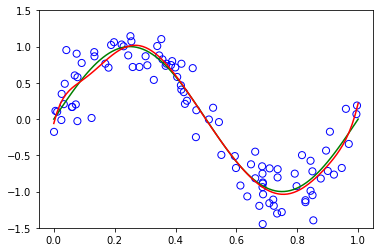

In [53]:
n_samples = 100
x,y = sample(n_samples)
#x = np.sort(np.random.uniform(0,1,n_samples))
#y = np.sin(2*np.pi*x) + np.random.normal(scale = 0.25, size=x.shape)

K= 9

X = np.array([np.power(x,k) for k in range(K+1)])
X = X.transpose()

#w,history = gradient_descent_vec(X,y,lr,iterations)
XT = X.transpose()
XTy = XT @ y
w = np.linalg.inv(XT@X) @ XTy
#w = np.linalg.pinv(X) @ y
print("w=:",w)

y_predict = 0 #np.zeros(x_test.shape) 
for i,wi in enumerate(w):
    y_predict+=wi*np.power(x_test,i) 


plt.scatter(x, y,facecolor="none", edgecolor="b", s=50, label="training data")


y_test = np.sin(2*np.pi*x_test)
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y_predict, c="r", label="fitting")
plt.ylim(-1.5, 1.5)

plt.show()

### 3.3.2 验证集、测试集

对于前面的正弦曲线采样点的拟合问题，下面代码采样了训练集、验证集、测试集共3个样本集。

In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n_pts = 10
x_train,y_train =  sample(n_pts)
x_valid,y_valid =  sample(n_pts) 
x_test,y_test =  sample(n_pts) 

用这些不同次数假设函数去训练并计算训练误差和验证误差。

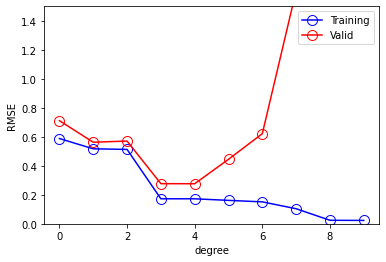

In [55]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

M = 10
errors_train, errors_valid  = [],[]
for K in range(M):  
    X = np.array([np.power(x_train,k) for k in range(K+1)])
    X = X.transpose()    
   
    XT = X.transpose()
    XTy = XT @ y_train
    w = np.linalg.inv(XT@X) @ XTy
 
    predict_train = X@w   
    error_train = rmse(y_train,predict_train)
    
    X_valid = np.array([np.power(x_valid,k) for k in range(K+1)])
    X_valid = X_valid.transpose()
    predict_valid =  X_valid@w
    error_valid = rmse(y_valid,predict_valid)
    
    errors_train.append(error_train)
    errors_valid.append(error_valid)

plt.plot(errors_train, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(errors_valid, 'o-', mfc="none", mec="r", ms=10, c="r", label="Valid")
plt.legend()
plt.xlabel("degree")
plt.ylabel("RMSE")
plt.ylim(0, 1.5)
plt.show()

可以看出多项式次数低于2时，训练误差和验证误差都比较大，说明对于训练集和验证集拟合效果都不好，即模型处于欠拟合状态，当多项式次数在3到4附近，训练误差和验证误差都比较小，当多项式次数开始大于5后，训练误差继续下降，但验证误差反而升高，说明模型的泛化能力开始变差。因此，次数是3或4的多项式函数是比较好的假设函数。

### 3.3.3  学习曲线

下面的loss()函数计算模型参数对应的假设函数在样本集(X,y)上的损失，learning_curves_trainSize()计算不同大小（trainSize）训练集的训练损失和验证损失，并绘制训练损失曲线和验证损失曲线。


In [56]:
def loss(w,X,y):
    X = np.hstack((np.ones((X.shape[0], 1), dtype=X.dtype),X))  #添加一列特征1    
    predictions = X @ w
    errors = predictions - y
    return (errors**2).mean()/2

def learning_curves_trainSize(X_train, y_train, X_val, y_val,alpha=0.3,iterations = 1000):
    train_err = np.zeros(len(y_train))
    valid_err = np.zeros(len(y_train))
    for i in range(len(y_train)):
        w_history = linear_regression_vec(X_train[0:i + 1, :], y_train[0:i + 1],alpha,iterations)
        w = w_history[-1]
        train_err[i] = loss(w, X_train[0:i + 1, :], y_train[0:i + 1])
        valid_err[i] = loss(w, X_val, y_val)
        
    plt.plot(range(1, len(y_train) + 1), train_err, c="r", linewidth=2)
    plt.plot(range(1, len(y_train) + 1), valid_err, c="b", linewidth=2)
    plt.xlabel("number of training examples", fontsize=14)
    plt.ylabel("error", fontsize=14)
    plt.legend(["training", "validation"], loc="best")
    
    max_err = np.max( np.array([np.max(train_err),np.max(valid_err)]))
    min_err = np.min( np.array([np.min(train_err),np.min(valid_err)]))
    offset = (max_err-min_err)/10    
    plt.axis([1, len(y_train)+1, min_err-offset, max_err+offset])
    #plt.axis([1, len(y_train)+1, 0, 100])
    plt.grid()

对正弦曲线采样一组训练集和验证集，测试这个learning_curves_batchSize()：

gradient is small enough!
iterated num is : 117
gradient is small enough!
iterated num is : 45479
gradient is small enough!
iterated num is : 38566
gradient is small enough!
iterated num is : 34679
gradient is small enough!
iterated num is : 31796
gradient is small enough!
iterated num is : 28833
gradient is small enough!
iterated num is : 26864
gradient is small enough!
iterated num is : 25232
gradient is small enough!
iterated num is : 23992
gradient is small enough!
iterated num is : 22797
gradient is small enough!
iterated num is : 21439
gradient is small enough!
iterated num is : 20280
gradient is small enough!
iterated num is : 19367
gradient is small enough!
iterated num is : 18676
gradient is small enough!
iterated num is : 17943
gradient is small enough!
iterated num is : 16861
gradient is small enough!
iterated num is : 15985
gradient is small enough!
iterated num is : 14869
gradient is small enough!
iterated num is : 14034
gradient is small enough!
iterated num is : 13312
gr

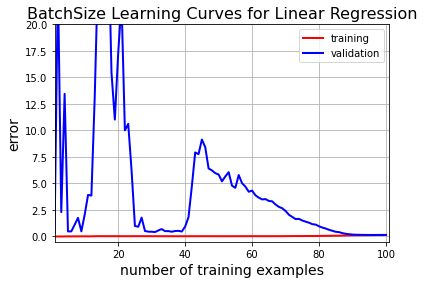

In [57]:
np.random.seed(89)
n_pts = 100
x_train,y_train =  sample(n_pts)
x_valid,y_valid =  sample(n_pts) 

#K = 4
K =2
X_train = np.array([np.power(x_train,k+1) for k in range(K)]).transpose()
X_valid = np.array([np.power(x_valid,k+1) for k in range(K)]).transpose()

plt.title("BatchSize Learning Curves for Linear Regression", fontsize=16)

alpha=0.3
iterations = 50000
learning_curves_trainSize(X_train, y_train, X_valid, y_valid,alpha,iterations)

plt.ylim(-0.5, 20)
plt.show()

通过学习曲线，当会发现验证误差反而变大（过拟合）后，可以尽**早停**止无意义的继续训练。

对于大坝出水量问题，可以观察不同次数多项式的不同训练集大小的学习曲线。

(12, 1)
(21, 1)
gradient is small enough!
iterated num is : 161
gradient is small enough!
iterated num is : 190
gradient is small enough!
iterated num is : 179
gradient is small enough!
iterated num is : 182
gradient is small enough!
iterated num is : 178
gradient is small enough!
iterated num is : 187
gradient is small enough!
iterated num is : 181
gradient is small enough!
iterated num is : 179
gradient is small enough!
iterated num is : 186
gradient is small enough!
iterated num is : 156
gradient is small enough!
iterated num is : 179
gradient is small enough!
iterated num is : 186


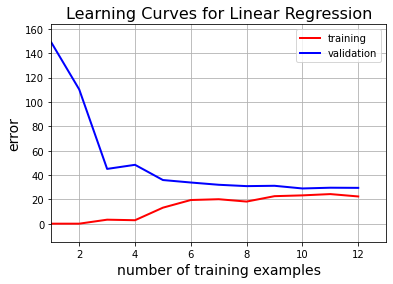

(12, 3)
(21, 3)
gradient is small enough!
iterated num is : 152
gradient is small enough!
iterated num is : 152
gradient is small enough!
iterated num is : 179
gradient is small enough!
iterated num is : 12578
gradient is small enough!
iterated num is : 1313
gradient is small enough!
iterated num is : 665
gradient is small enough!
iterated num is : 187
gradient is small enough!
iterated num is : 187
gradient is small enough!
iterated num is : 182
gradient is small enough!
iterated num is : 178
gradient is small enough!
iterated num is : 184
gradient is small enough!
iterated num is : 182


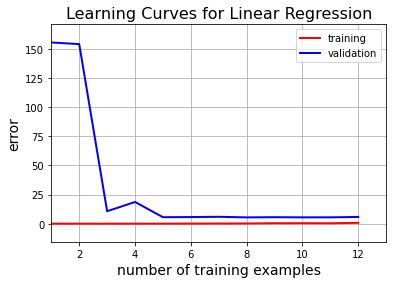

(12, 9)
(21, 9)
gradient is small enough!
iterated num is : 135
gradient is small enough!
iterated num is : 151
gradient is small enough!
iterated num is : 169
gradient is small enough!
iterated num is : 1932
gradient is small enough!
iterated num is : 2386
gradient is small enough!
iterated num is : 12627
gradient is small enough!
iterated num is : 50257


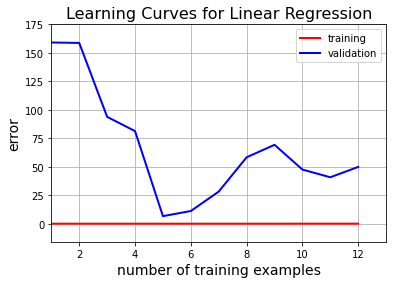

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

dataset = sio.loadmat("water.mat")
x_train = dataset["X"]
x_val = dataset["Xval"]
x_test = dataset["Xtest"]

# squeeze the target variables into one dimensional arrays
y_train = dataset["y"].squeeze()
y_val = dataset["yval"].squeeze()
y_test = dataset["ytest"].squeeze()

alphas = [0.3,0.3,0.3]
iterations = [100000,100000,100000]
for i, n in enumerate([1,3, 9]):
    x_train_n  =np.hstack(tuple(x_train**(i+1)  for i in range(n) )  ) #  (x_train_1,x_train**2,x_train**3,x_train**4))
    train_means = x_train_n.mean(axis=0)
    train_stdevs = np.std(x_train_n, axis=0, ddof=1)
    x_train_n = (x_train_n - train_means) / train_stdevs
    x_val_n  =np.hstack(tuple(x_val**(i+1)  for i in range(n) )  ) #  (x_train_1,x_train**2,x_train**3,x_train**4))
    x_val_n = (x_val_n - train_means) / train_stdevs

    plt.title("Learning Curves for Linear Regression", fontsize=16)
    print(x_train_n.shape)
    #print(w.shape)
    print(x_val_n.shape)
    learning_curves_trainSize(x_train_n, y_train, x_val_n, y_val,alphas[i],iterations[i])
    plt.show()

对于确定的假设函数，还可以通过迭代学习曲线，观察多少迭代次数比较合适。

In [58]:
def learning_curves_iterations(X_train, y_train, X_valid, y_valid,alpha=0.3,iterations = 10000):    
    w_history = linear_regression_vec(X_train, y_train,alpha,iterations)
    train_err = compute_loss_history(X_train, y_train,w_history)
    valid_err = compute_loss_history(X_valid, y_valid,w_history) 
        
    plt.plot(range(1, len(train_err) + 1), train_err, c="r", linewidth=2)
    plt.plot(range(1, len(train_err) + 1), valid_err, c="b", linewidth=2)
    plt.xlabel("iterations", fontsize=14)
    plt.ylabel("error", fontsize=14)
    plt.legend(["training", "validation"], loc="best")
    max_err = np.max( np.array([np.max(train_err),np.max(valid_err)]))
    min_err = np.min( np.array([np.min(train_err),np.min(valid_err)]))
    offset = (max_err-min_err)/10
    plt.axis([1, len(train_err)+1, min_err-offset, max_err+offset])
    plt.grid()

对于2次多项式假设函数，下面代码绘制了其迭代过程中的训练和验证损失的学习曲线：

In [ ]:
np.random.seed(89)
n_pts = 100
x_train,y_train =  sample(n_pts)
x_valid,y_valid =  sample(n_pts)

K = 2
X_train = np.array([np.power(x_train,k+1) for k in range(K)]).transpose()
X_valid = np.array([np.power(x_valid,k+1) for k in range(K)]).transpose()

plt.title("Iteration Learning Curves for Linear Regression", fontsize=16)

learning_curves_iterations(X_train, y_train, X_valid, y_valid,0.001,2000)
plt.show()

### 3.3.4  偏差和方差（Bias-Variance）

假如要学习的函数$f(x)=𝑥+2*np.sin(1.5*x)$，下面代码绘制这个函数曲线和从该函数采样的一组$\{x_i,y_i\}$：

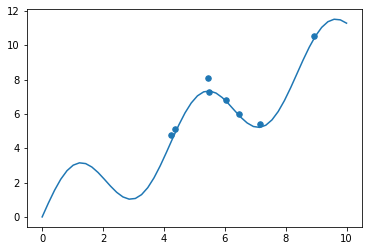

In [60]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

f = lambda x: 𝑥+2*np.sin(1.5*x)

def plot_f(pts=50):
    x = np.linspace(0, 10, pts)
    f_ = f(x)
    plt.plot(x,f_)


def sample_f(pts =8):
    x = np.random.uniform(0,10,pts)
    f = 𝑥+2*np.sin(1.5*x)
    y = f+np.random.normal(0, 0.5, pts) #随机噪声
    return x,y
    
plot_f()    
x,y = sample_f()
plt.scatter(x,y,s=30)#, facecolors='none', edgecolors='r')

用一个常数函数即$\hat f(x)=b$作为假设函数模型来逼近这个函数$f(x)$，对于一个训练集中的每个$\{x_i,y_i\},i=1,2,\cdots,m$，$\hat f(x)=b$的预测值都是$b$，因此最小化 $ \sum_{i=1}^m{(b-y_i)}^2$，可以求得：

$$b = \frac{\sum_{i=1}^m{y_i}}{m} = np.mean(y_i)$$

下面代码用50个训练集训练求得了50个假设函数，然后计算这些假设函数在x=5处的预测偏差和预测方差。

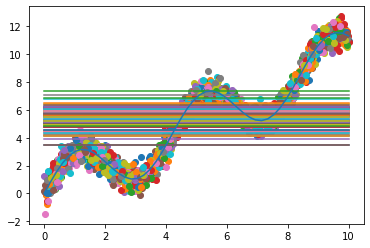

真正的函数值: 19.912751856809006
预测期望值: 5.348626589850284
预测的偏差: -14.564125266958722
预测的方差: 0.7240080347500965


In [61]:
train_set_num = 100

def plot_b(b,pts=10):
    x = np.linspace(0, 10, pts)
    hat_f = [b for i in range(pts)]
    plt.plot(x,hat_f)
     

bs=[]
for i in range(train_set_num):
    x,y = sample_f(20)
    plt.scatter(x,y)
    b = np.mean(y)  
    bs.append(b)
    plot_b(b)

plot_f() 
plt.show()

x = 18
f_true = f(x)
f_predict_mean = np.mean(bs)
print("真正的函数值:",f_true)
print("预测期望值:",f_predict_mean)
print("预测的偏差:",f_predict_mean - f_true)
print("预测的方差:",np.std(bs))

如果用一个一次函数$\hat f(x)=wx+b$作为假设函数，按照同样的过程，可以求相应的偏差和方差估计：

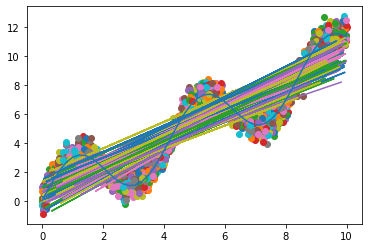

真正的函数值: 19.912751856809006
预测期望值: 7.968426904632803
预测的偏差: -11.944324952176203
预测的方差: 10.868072850656498


In [62]:
ws = []
for i in range(train_set_num):
    x,y = sample_f(20)
    plt.scatter(x,y)
    X = np.hstack((np.ones((len(x), 1), dtype=x.dtype),x[:, None]))    
    XT = X.transpose()
    XTy = XT @ y 
    w = np.linalg.inv(XT@X) @ XTy
    draw_line(plt,w[1],w[0],x)
    ws.append(w) 
    
  
plot_f() 
plt.show()

x = 18
f_true = f(x)

f_predict = np.array([ w*x+b for w,b in ws]) 

f_predict_mean = np.mean(f_predict)
print("真正的函数值:",f_true)
print("预测期望值:",f_predict_mean)
print("预测的偏差:",f_predict_mean - f_true)
print("预测的方差:",np.std(f_predict))

## 3.4 正则化（Regularization）

增加正则项的损失函数变为：

$$L(x;\pmb w) = \frac{1}{2m} \sum_{i=1}^{m} {\| \pmb x^{(i)}\pmb w - \pmb y^{(i)} \|}^2 +\lambda \|\pmb w^2 \| \tag{3-28}$$

其中：

$$ \|\pmb w^2 \| = {w_0}^2+  {w_1}^2 +\cdots+ {w_n}^2 $$

新的损失函数的梯度变成了：

$$\nabla L(\pmb w ) = \frac{1}{m} \sum_{i=1}^{m} ( \pmb x^{(i)}\pmb w - \pmb y^{(i)}) x^{(i)}+ 2\lambda \pmb w \tag{3-29}$$

因此，在梯度下降法求偏导数时，只要计算偏导数时，添加后面一项的梯度就可以了。下面是惩罚项版本的梯度下降法：

In [63]:
def gradient_descent_reg(X, y, reg, alpha, num_iters,gamma = 0.8,epsilon=1e-8):
    w_history = []          # 记录迭代过程中的参数
    X = np.hstack((np.ones((X.shape[0], 1), dtype=X.dtype),X))  #添加一列特征1    
    num_features = X.shape[1] 
    v= np.zeros_like(num_features)
    w = np.zeros(num_features)
    for n in range(num_iters):
        predictions = X @ w                 #求假设函数的预测值，即f(x)
        errors = predictions - y                # 预测值和真实值的误差
        gradient = X.transpose() @ errors /len(y)        #计算梯度
        gradient += 2*reg*w
        if np.max(np.abs(gradient))<epsilon:
            print("gradient is small enough!")
            print("iterated num is :",n)
            break
        #w -= alpha * gradient        #更新模型的参数
        v = gamma*v+alpha* gradient
        w= w-v
        
        w_history.append(w)       
    return w_history                  # return optimized parameters and cost history

In [64]:
def loss_reg(w,X,y,reg = 0.):
    errors = X@w[1:]+w[0]-y
    reg_error = reg*np.sum(np.square(w))
    return (errors**2).mean()/2+reg_error   

def compute_loss_history_reg(X,y,w_history,reg = 0.):
    loss_history = []
    for w in w_history: 
        loss_history.append(loss_reg(w,X,y,reg))
    return loss_history

gradient is small enough!
iterated num is : 184
w: [8.0125638  5.77020132 3.33374366 3.45447778 2.09236532 2.04302421
 1.33515407 1.19533911 0.85628787 0.68738516]


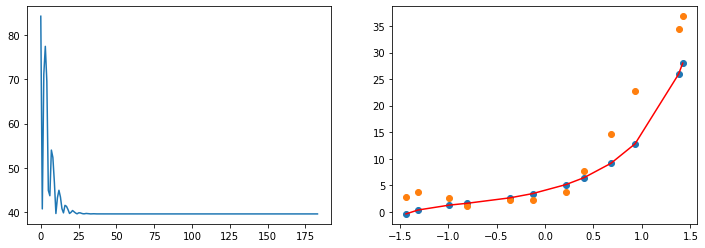

In [65]:
reg = 0.2
iterations = 100000
history = gradient_descent_reg(x_train_n,y_train,reg,alpha,iterations)
print("w:",history[-1])
loss_history = compute_loss_history_reg(x_train_n,y_train,history,reg)
plot_history_predict(x_train_n,y_train,history[-1],loss_history)

修改绘制学习曲线的函数learning_curves()。

In [66]:
def learning_curves(X_train, y_train, X_val, y_val,reg,alpha=0.3,iterations = 1000):
    train_err = np.zeros(len(y_train))
    val_err = np.zeros(len(y_train))
    for i in range(1, len(y_train)):
        w_history = gradient_descent_reg(X_train[0:i + 1, :], y_train[0:i + 1],reg,alpha,iterations)
        w = w_history[-1]
        train_err[i] = loss_reg(w, X_train[0:i + 1, :], y_train[0:i + 1],reg)
        val_err[i] = loss_reg(w, X_val, y_val,reg)  
    plt.plot(range(2, len(y_train) + 1), train_err[1:], c="r", linewidth=2)
    plt.plot(range(2, len(y_train) + 1), val_err[1:], c="b", linewidth=2)
    plt.xlabel("number of training examples", fontsize=14)
    plt.ylabel("error", fontsize=14)
    plt.legend(["training", "validation"], loc="best")
    plt.axis([2, len(y_train), 0, 100])
    plt.grid()

绘制学习曲线。

(12, 9)
(2,)
(21, 9)
gradient is small enough!
iterated num is : 166
gradient is small enough!
iterated num is : 177
gradient is small enough!
iterated num is : 184
gradient is small enough!
iterated num is : 190
gradient is small enough!
iterated num is : 191
gradient is small enough!
iterated num is : 183
gradient is small enough!
iterated num is : 185
gradient is small enough!
iterated num is : 185
gradient is small enough!
iterated num is : 185
gradient is small enough!
iterated num is : 185
gradient is small enough!
iterated num is : 184


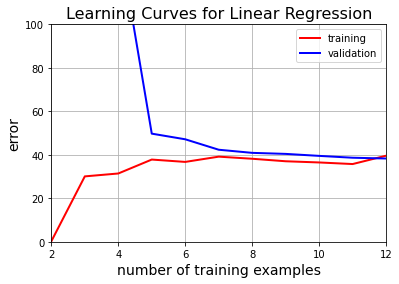

In [67]:
x_val_n  =np.hstack(tuple(x_val**(i+1)  for i in range(n) )  ) #  (x_train_1,x_train**2,x_train**3,x_train**4))
x_val_n = (x_val_n - train_means) / train_stdevs

plt.title("Learning Curves for Linear Regression", fontsize=16)
print(x_train_n.shape)
print(w.shape)
print(x_val_n.shape)
reg = 0.2
learning_curves(x_train_n, y_train, x_val_n, y_val,reg,alpha,iterations)